In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
from matplotlib import pyplot
import seaborn as sns

def f(x):
    return np.log(x+1)

In [2]:
df = read_csv('train_data.csv', header=0, index_col=0)
print(df.head())

# Transformations
df['date'] = pd.to_datetime(df['date'])
df['response_log'] = df['response'].apply(f)

         date  county  chng_smoothed_adj_outpatient_cli  \
1  2020-06-01    1073                          1.734587   
2  2020-06-01    4013                          1.583965   
3  2020-06-01    4019                          2.478360   
4  2020-06-01    6001                          3.918585   
5  2020-06-01    6013                          1.427697   

   chng_smoothed_adj_outpatient_covid  chng_smoothed_outpatient_cli  \
1                            0.106936                      1.600603   
2                            0.238237                      1.610365   
3                            0.129131                      2.720644   
4                            0.085287                      3.642710   
5                            0.123045                      1.570387   

   chng_smoothed_outpatient_covid  doctor-visits_smoothed_adj_cli  \
1                        0.095467                        3.025067   
2                        0.227908                        2.840442   
3          

In [3]:
counties = df['county'].unique().tolist()
print(counties)

[1073, 4013, 4019, 6001, 6013, 6019, 6029, 6037, 6059, 6065, 6067, 6071, 6073, 6077, 6085, 6099, 6111, 8001, 8031, 8041, 9001, 9003, 9009, 12011, 12031, 12057, 12071, 12086, 12095, 12099, 12103, 12105, 13067, 13089, 13121, 13135, 16001, 17031, 17043, 17089, 17097, 17197, 18089, 18097, 19153, 20091, 20173, 21111, 24031, 24033, 25009, 25017, 25025, 26081, 26099, 26125, 26163, 27053, 29095, 29189, 31055, 32003, 35001, 36005, 36029, 36047, 36059, 36061, 36081, 36103, 36119, 37119, 37183, 39035, 39049, 39061, 39113, 40109, 40143, 42003, 42101, 44007, 45045, 47037, 47157, 48029, 48085, 48113, 48121, 48141, 48201, 48215, 48303, 48439, 48453, 49035, 49049, 53033, 55079, 55133]


<AxesSubplot:xlabel='date'>

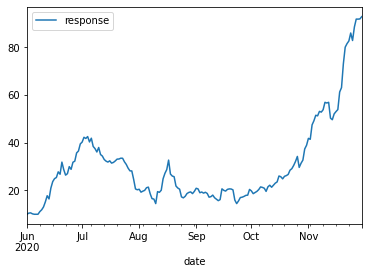

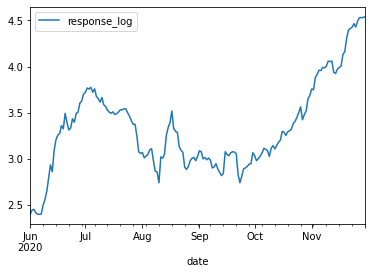

In [4]:
df1073 = df[df['county'] == 1073]
df1073.plot('date', 'response')
df1073.plot('date', 'response_log')

<AxesSubplot:xlabel='date'>

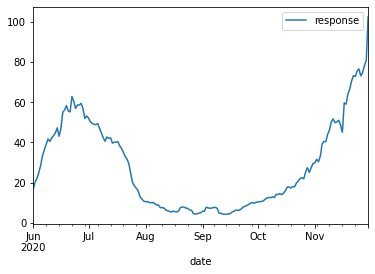

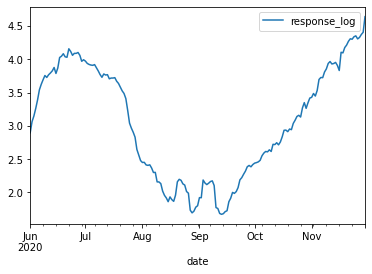

In [5]:
df4013 = df[df['county'] == 4013]
df4013.plot('date', 'response')
df4013.plot('date', 'response_log')

<AxesSubplot:xlabel='date'>

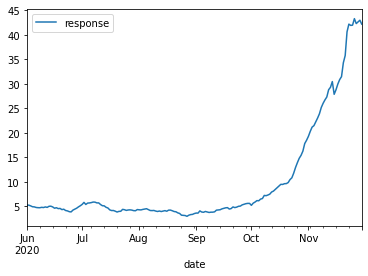

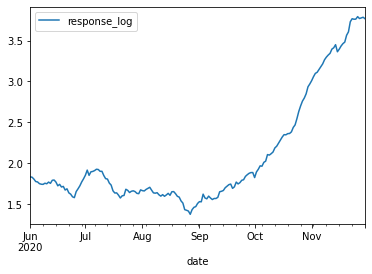

In [6]:
df36005 = df[df['county'] == 36005]
df36005.plot('date', 'response')
df36005.plot('date', 'response_log')

In [8]:
df_temp = pd.get_dummies(df, prefix=['county'], columns=['county'])


In [9]:
df_temp

,date,chng_smoothed_adj_outpatient_cli,chng_smoothed_adj_outpatient_covid,chng_smoothed_outpatient_cli,chng_smoothed_outpatient_covid,doctor-visits_smoothed_adj_cli,doctor-visits_smoothed_cli,fb-survey_smoothed_cli,fb-survey_smoothed_hh_cmnty_cli,fb-survey_smoothed_ili,...,county_48201,county_48215,county_48303,county_48439,county_48453,county_49035,county_49049,county_53033,county_55079,county_55133
1,2020-06-01,1.734587,0.106936,1.600603,0.095467,3.025067,2.757994,0.252375,14.008563,0.252375,...,0,0,0,0,0,0,0,0,0,0
2,2020-06-01,1.583965,0.238237,1.610365,0.227908,2.840442,3.964751,0.366760,13.232588,0.376429,...,0,0,0,0,0,0,0,0,0,0
3,2020-06-01,2.478360,0.129131,2.720644,0.132313,2.547498,3.770899,0.606955,16.650415,0.600353,...,0,0,0,0,0,0,0,0,0,0
4,2020-06-01,3.918585,0.085287,3.642710,0.082930,1.840819,2.127030,0.251949,10.139948,0.300922,...,0,0,0,0,0,0,0,0,0,0
5,2020-06-01,1.427697,0.123045,1.570387,0.111393,2.364599,3.288683,0.140145,8.213925,0.150843,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18296,2020-11-30,6.745637,2.838909,7.253291,3.092718,15.851526,17.780651,1.753087,38.438334,1.803408,...,0,0,0,0,0,1,0,0,0,0
18297,2020-11-30,16.152816,1.283203,16.503462,1.276698,7.405778,6.651997,2.258082,45.455855,2.258082,...,0,0,0,0,0,0,1,0,0,0
18298,2020-11-30,8.108174,0.910226,8.533337,0.901584,17.272424,20.872014,0.368948,19.012553,0.506259,...,0,0,0,0,0,0,0,1,0,0
18299,2020-11-30,4.657846,1.513101,4.849651,1.546724,8.169531,10.775481,2.193921,37.377444,2.215550,...,0,0,0,0,0,0,0,0,1,0


In [10]:
df_temp['county_49035_hospital'] = df_temp['county_49035'] * df_temp['hospital-admissions_smoothed_adj_covid19_from_claims']

In [11]:
df_temp

,date,chng_smoothed_adj_outpatient_cli,chng_smoothed_adj_outpatient_covid,chng_smoothed_outpatient_cli,chng_smoothed_outpatient_covid,doctor-visits_smoothed_adj_cli,doctor-visits_smoothed_cli,fb-survey_smoothed_cli,fb-survey_smoothed_hh_cmnty_cli,fb-survey_smoothed_ili,...,county_48215,county_48303,county_48439,county_48453,county_49035,county_49049,county_53033,county_55079,county_55133,county_49035_hospital
1,2020-06-01,1.734587,0.106936,1.600603,0.095467,3.025067,2.757994,0.252375,14.008563,0.252375,...,0,0,0,0,0,0,0,0,0,0.000000
2,2020-06-01,1.583965,0.238237,1.610365,0.227908,2.840442,3.964751,0.366760,13.232588,0.376429,...,0,0,0,0,0,0,0,0,0,0.000000
3,2020-06-01,2.478360,0.129131,2.720644,0.132313,2.547498,3.770899,0.606955,16.650415,0.600353,...,0,0,0,0,0,0,0,0,0,0.000000
4,2020-06-01,3.918585,0.085287,3.642710,0.082930,1.840819,2.127030,0.251949,10.139948,0.300922,...,0,0,0,0,0,0,0,0,0,0.000000
5,2020-06-01,1.427697,0.123045,1.570387,0.111393,2.364599,3.288683,0.140145,8.213925,0.150843,...,0,0,0,0,0,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18296,2020-11-30,6.745637,2.838909,7.253291,3.092718,15.851526,17.780651,1.753087,38.438334,1.803408,...,0,0,0,0,1,0,0,0,0,7.204317
18297,2020-11-30,16.152816,1.283203,16.503462,1.276698,7.405778,6.651997,2.258082,45.455855,2.258082,...,0,0,0,0,0,1,0,0,0,0.000000
18298,2020-11-30,8.108174,0.910226,8.533337,0.901584,17.272424,20.872014,0.368948,19.012553,0.506259,...,0,0,0,0,0,0,1,0,0,0.000000
18299,2020-11-30,4.657846,1.513101,4.849651,1.546724,8.169531,10.775481,2.193921,37.377444,2.215550,...,0,0,0,0,0,0,0,1,0,0.000000
